# Welcome to the `pysan` development notebook
This colab notebook is currently being tested as a workspace to develop new features. Code below is not deployment-ready, and is meant purely as a transparent way to see what kinds of features are in the works.

Note: this notebook is meant to be run on your local system after cloning the repository.

In [1]:
import sys
sys.path.insert(1,'../../')
import pysan as ps

pysan ready


## Development Area
If the output of the previous cell reads `pysan ready.`, then everything is working and you're ready to go. Remember to leave lots of comments (and docstrings) so that anyone reading this page can understand what's going on!

In [2]:
import matplotlib.pyplot as plt

plt.style.use('pysan.mplstyle')

s1 = ps.generate_sequence(30, [1,2,3])
s2 = ps.generate_sequence(30, [1,2,3,4])
s3 = ps.generate_sequence(30, [2,3,4])
#sequence = ['A','A','B','A','A','C','C','C','A','B','A','A']


shared n-grams: {'[2, 3]': 8, '[3, 3]': 14, '[3, 2]': 7, '[2, 2]': 7}


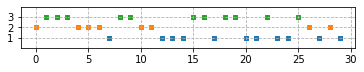

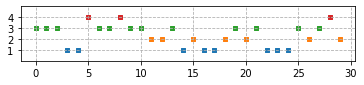

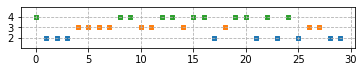

In [3]:

found_ngrams = 'none'
for sequence in [s1, s2, s3]:
    ps.plot_sequence(sequence)
    ngrams = ps.get_ngram_counts(sequence, 2)
    if found_ngrams == 'none':
        found_ngrams = ngrams
    else:
        keys_to_remove = []
        for key, value in found_ngrams.items():
            if key in ngrams.keys():
                found_ngrams[key] = value + ngrams[key]
            else:
                keys_to_remove.append(key)
        for key in keys_to_remove:
            del found_ngrams[key]

print('shared n-grams:', (found_ngrams))

In [4]:
longest = ps.get_longest_spell(sequence)
display(longest)

{'element': 3, 'count': 4, 'start': 4}

<module 'matplotlib.pyplot' from '/home/ojs/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

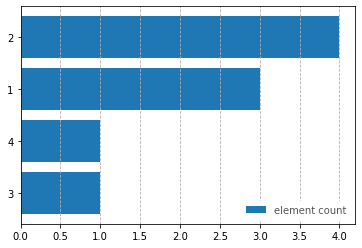

In [5]:
sequence = [1,1,2,1,2,2,3,4,2]
ps.plot_element_counts(sequence)

In [25]:

    
sequence = [1,1,2,3,4]

def first_position_report(sequence):
    
    unique_elements = list(set(sequence))
    
    first_positions = {}
    for element in unique_elements:
        first_positions[element] = sequence.index(element)
        
    return first_positions

first_position_report(sequence)

{1: 0, 2: 2, 3: 3, 4: 4}